## UADE Data Science 
Bienvenido al primer challenge en análisis de datos .. LET'S PLAY A GAME! 
El dataset adjunto contiene información sobre cursos de la plataforma UDemy
Como parte de este primer ejercicio usted deberá
- 1) **Identificar el formato de archivo a ser importado**
- 2) **Importar los datos dentro de un objeto Python / Numpy / Pandas para su manipulación**
- 3) Identificar nulos y reemplazarlos por valores acordes
- 4) **Reemplazar Nombre de columnas por nuevos descriptivos**
- 5) Ordenar / Rankear los cursos por una variable/columna que nos proveea la relevancia del mismo
- 6) Crear al menos dos DF diferentes con información que considere relevante
- Opcional - General Charts utilizando Matploitlib o similar

---
## Importar las librerias 

In [ ]:
#pip install empiricaldist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
#from empiricaldist import Pmf, Cdf 

---
## Identificar el formato del archivo
Leemos el archivo .csv con pd.read_csv(), separado por ';'

El argumento comment = '#' interpreta que toda línea que contiene "#" es un comentario.

---
## Importar los datos dentro de un objeto Python / Numpy / Pandas para su manipulación

In [3]:
url='https://raw.githubusercontent.com/al34n1x/DataScience/master/3.Pandas/udemy_courses_ejercicio.csv'
df = pd.read_csv(url, sep = ";", comment = "#", parse_dates=['published_timestamp'])

df.info()
df.to_csv('File.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3671 non-null   object             
 2   url                  3645 non-null   object             
 3   is_paid              3645 non-null   object             
 4   price                3632 non-null   float64            
 5   num_subscribers      3645 non-null   float64            
 6   num_reviews          3645 non-null   float64            
 7   num_lectures         3645 non-null   float64            
 8   level                3614 non-null   object             
 9   content_duration     3645 non-null   float64            
 10  published_timestamp  3645 non-null   datetime64[ns, UTC]
 11  subject              3645 non-null   object             
dtypes: datetime64[ns, UT

In [ ]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                             object
price                              float64
num_subscribers                    float64
num_reviews                        float64
num_lectures                       float64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [ ]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147.0,23.0,51.0,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792.0,923.0,274.0,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174.0,74.0,51.0,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451.0,11.0,36.0,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276.0,45.0,26.0,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


Analizamos la cantidad de filas y columnas que tiene el dataframa

In [ ]:
print("El dataframe tiene: ", df.shape[0], "filas")
print("El dataframe tiene: ", df.shape[1], "columnas")

El dataframe tiene:  3678 filas
El dataframe tiene:  12 columnas


---
## Reemplazar Nombre de columnas por nuevos descriptivos

In [ ]:
df.columns = ['id_curso', 'titulo', 'url', 'pago', 'costo',
       'subscriptores', 'revisiones', 'lecturas', 'nivel',
       'duracion', 'fecha', 'categoria']

df.head()

,id_curso,titulo,url,pago,costo,subscriptores,revisiones,lecturas,nivel,duracion,fecha,categoria
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147.0,23.0,51.0,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792.0,923.0,274.0,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174.0,74.0,51.0,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451.0,11.0,36.0,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276.0,45.0,26.0,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


---
## Identificar valores Nulos

Analizamos la cantidad de filas y columnas que tiene el dataframa

In [ ]:
df.isnull().sum()

id_curso          0
titulo            7
url              33
pago             33
costo            46
subscriptores    33
revisiones       33
lecturas         33
nivel            64
duracion         33
fecha            33
categoria        33
dtype: int64

### Analizamos cada campos para evaluar los NaN

#### a. Campo: "titulo"

Buscamos Duplicados en titulo

In [ ]:
df_raw_descr = df.groupby('id_curso')[['titulo']].count()
df_raw_descr2 = df_raw_descr.sort_values(by = ['titulo'], ascending=False)
df_raw_descr2.head(10)

,titulo
id_curso,
1084454,2
837322,2
1157298,2
28295,2
1035638,2
185526,2
8324,1
866696,1
864482,1


Eliminamos los ids duplicados en `titulo` y verificamos

In [ ]:
df_raw4 = df.drop_duplicates() # elimina los duplicados
df_raw_descr3 = df_raw4.groupby('id_curso')[['titulo']].count()
df_raw_descr4 = df_raw_descr3.sort_values(by = ['titulo'], ascending=False)
df = df_raw4
df_raw_descr4.head(10)

,titulo
id_curso,
8324,1
863812,1
863976,1
863998,1
864482,1
865438,1
865630,1
865634,1
866384,1


#### b. Analizamos columnas con similar número de NaN y accedimos a la info viendo que los datos correspondian a esas filas motivo por el cual decidimos realizar un `.dropna()` de esas filas

In [ ]:
df.isnull().sum()

id_curso          0
titulo            7
url              33
pago             33
costo            46
subscriptores    33
revisiones       33
lecturas         33
nivel            64
duracion         33
fecha            33
categoria        33
dtype: int64

In [ ]:
df = df.dropna(subset=['url'])
df[df['url'].isnull()]

,id_curso,titulo,url,pago,costo,subscriptores,revisiones,lecturas,nivel,duracion,fecha,categoria


In [ ]:
df.isnull().sum()

id_curso          0
titulo            0
url               0
pago              0
costo            13
subscriptores     0
revisiones        0
lecturas          0
nivel            31
duracion          0
fecha             0
categoria         0
dtype: int64

#### c. Anallizamos los NaN de `nivel` y los reemplazamos por una categoria general = 'All Levels'

In [ ]:
df['nivel'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', nan], dtype=object)

In [ ]:
df["nivel"].value_counts()

All Levels            1906
Beginner Level        1266
Intermediate Level     409
Expert Level            58
Name: nivel, dtype: int64

In [ ]:
df['nivel'].fillna('All Levels',inplace=True)
df['nivel'].isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

In [ ]:
df.isnull().sum()

id_curso          0
titulo            0
url               0
pago              0
costo            13
subscriptores     0
revisiones        0
lecturas          0
nivel             0
duracion          0
fecha             0
categoria         0
dtype: int64

#### Buscamos los nulos en `costo`




In [ ]:
df.loc[df["costo"].isnull(), ["titulo", "categoria", "nivel", "pago", "costo"]]

,titulo,categoria,nivel,pago,costo
95,Options Trading 101: The Basics,Business Finance,Beginner Level,False,NaN
108,Website Investing 101 - Buying & Selling Onlin...,Business Finance,All Levels,False,NaN
119,Introduction to Financial Modeling,Business Finance,Intermediate Level,False,NaN
128,Corporate Finance - A Brief Introduction,Business Finance,Beginner Level,False,NaN
143,Accounting in 60 Minutes - A Brief Introduction,Business Finance,Beginner Level,False,NaN
179,Introduction to Cryptocurrencies and Blockchain,Business Finance,Beginner Level,False,NaN
209,Apply finance concepts for smart project manag...,Business Finance,Beginner Level,False,NaN
253,IAS 18 - Revenue,Business Finance,All Levels,False,NaN
283,สอนเทรดไบนารี่ อ๊อฟชั่นอย่างง่าย,Business Finance,All Levels,False,NaN
291,"Multiply your returns using 'Value Investing"",...",Business Finance,All Levels,False,NaN


Objetivo: Analizamos los NaN de `costo`. Filtramos los registros que tienen `costo` NaN.

Encontramos un campo relacionado con el precio `pago` y vemos que los NaN de `costo` se corresponden con `['pago'] = False`, con lo que se decide reemplazar por 0 el valor de los NaN de `costo`

In [ ]:
df['costo'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Vemos que no quedan NaN

In [ ]:
df.isnull().sum()

id_curso         0
titulo           0
url              0
pago             0
costo            0
subscriptores    0
revisiones       0
lecturas         0
nivel            0
duracion         0
fecha            0
categoria        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3639 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id_curso       3639 non-null   int64              
 1   titulo         3639 non-null   object             
 2   url            3639 non-null   object             
 3   pago           3639 non-null   object             
 4   costo          3639 non-null   float64            
 5   subscriptores  3639 non-null   float64            
 6   revisiones     3639 non-null   float64            
 7   lecturas       3639 non-null   float64            
 8   nivel          3639 non-null   object             
 9   duracion       3639 non-null   float64            
 10  fecha          3639 non-null   datetime64[ns, UTC]
 11  categoria      3639 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(5)
memory usage: 369.6+ KB


---


## Ordenar / Rankear los cursos por una variable/columna que nos provea la relevancia del mismo
La columna que se podria generar una categorización es la de `nivel`

#### Creamos un campo con el valor del año (`year`) a partir del campo `date`

In [ ]:
df['year']= df['fecha'].dt.year
df.year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    2017
1    2017
2    2016
3    2017
4    2016
Name: year, dtype: int64

Para realizar el mismo análisis sobre variables con `type = "object"` hay que cambiar el tipo de dato, de `object` a `category`

In [ ]:
columnas_categoricas = ["pago", "nivel", "categoria"]
for column in columnas_categoricas:
    print("Valores únicos de la columna ", column, ":", df[column].unique(), "\n-----")

Valores únicos de la columna  pago : [True False] 
-----
Valores únicos de la columna  nivel : ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level'] 
-----
Valores únicos de la columna  categoria : ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development'] 
-----


Con la fila `unique` podemos observar la cantidad de categorías por columna

Con la fila `top` podemos observar la categoría que más se repite

Con la fila `freq` podemos observar la cantidad de apariciones de dicha categoría

In [ ]:
df[columnas_categoricas] = df[columnas_categoricas].astype("category")
df[columnas_categoricas].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pago,nivel,categoria
count,3639,3639,3639
unique,2,4,4
top,True,All Levels,Web Development
freq,3330,1906,1190


---
## Crear `df` diferentes con información que consideramos relevante

#### a. Se creo un `df_rank` en la que se categorizaron columnas con valores escalares (`lecturas, revisiones, subscriptores`) usando el método `.rank(method='dense')` y modelando estos datos posteriormente.

In [ ]:
df_rank = df
df_rank['points_lectures'] = df_rank['lecturas'].rank(method='dense')
df_rank['points_reviews'] = df_rank['revisiones'].rank(method='dense')
df_rank['points_subscribers'] = df_rank['subscriptores'].rank(method='dense')
df_rank['points_lectures_ponder'] = df_rank['points_lectures'] * 0.5
df_rank['points_reviews_ponder'] = df_rank['points_reviews'] * 0.25
df_rank['points_subscribers_ponder'] = df_rank['points_subscribers'] * 0.25
df_rank['points_relevance'] = df_rank['points_lectures_ponder'] + df_rank['points_reviews_ponder'] + df_rank['points_subscribers_ponder']
df_rank['rank_relevance'] = df_rank['points_relevance'].rank(method='dense',  ascending=False)
df_rank = df_rank.sort_values('rank_relevance')
df_rank.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,id_curso,titulo,url,pago,costo,subscriptores,revisiones,lecturas,nivel,duracion,...,categoria,year,points_lectures,points_reviews,points_subscribers,points_lectures_ponder,points_reviews_ponder,points_subscribers_ponder,points_relevance,rank_relevance
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.0,121584.0,27445.0,342.0,All Levels,43.0,...,Web Development,2015,210.0,511.0,2175.0,105.0,127.75,543.75,776.50,1.0
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200.0,75499.0,7676.0,362.0,All Levels,30.0,...,Musical Instruments,2014,214.0,502.0,2167.0,107.0,125.50,541.75,774.25,2.0
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190.0,73783.0,19649.0,329.0,All Levels,22.0,...,Web Development,2016,207.0,509.0,2166.0,103.5,127.25,541.50,772.25,3.0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200.0,114512.0,22412.0,304.0,All Levels,30.5,...,Web Development,2016,200.0,510.0,2173.0,100.0,127.50,543.25,770.75,4.0
1982,42271,Complete Guitar System - Beginner to Advanced,https://www.udemy.com/complete-guitar-system-b...,True,145.0,32935.0,2713.0,310.0,All Levels,34.0,...,Musical Instruments,2013,203.0,484.0,2132.0,101.5,121.00,533.00,755.50,5.0


#### b. Contenido por `categoria y nivel`, total de `costo, subscriptores, duracion, revisiones y lecturas`

In [ ]:
df1 =  df_rank.groupby(['categoria','nivel'])[['costo','subscriptores','duracion','revisiones','lecturas']].sum()
df1

costo  subscriptores     duracion  \
categoria           nivel                                                     
Business Finance    All Levels          52155.0      1043254.0  2853.766667   
                    Beginner Level      18130.0       647007.0   959.933333   
                    Expert Level         2975.0        30146.0    58.516667   
                    Intermediate Level   8455.0       144350.0   363.716667   
Graphic Design      All Levels          18685.0       688332.0  1208.383333   
                    Beginner Level      12975.0       315757.0   765.016667   
                    Expert Level          350.0         1008.0    23.000000   
                    Intermediate Level   2650.0        51713.0   157.550000   
Musical Instruments All Levels          14605.0       311196.0   867.333333   
                    Beginner Level      12820.0       428919.0   717.550000   
                    Expert Level          255.0         5431.0    18.000000   
                    Intermediate Level   4725.0        76163.0   311.616667   
Web Development     All Levels          54090.0      4798347.0  4382.050000   
                    Beginner Level      26635.0      2657687.0  1477.200000   
                    Expert Level         1705.0        13611.0    69.000000   
                    Intermediate Level   9545.0       450542.0   710.500000   

                                        revisiones  lecturas  
categoria           nivel                                     
Business Finance    All Levels             39701.0   25753.0  
                    Beginner Level         28242.0    9302.0  
                    Expert Level            1167.0     613.0  
                    Intermediate Level      6757.0    2972.0  
Graphic Design      All Levels             19456.0   10644.0  
                    Beginner Level         15784.0    7118.0  
                    Expert Level              57.0     169.0  
                    Intermediate Level      1623.0    1323.0  
Musical Instruments All Levels             16690.0   10991.0  
                    Beginner Level         10335.0    9882.0  
                    Expert Level             148.0     276.0  
                    Intermediate Level      4429.0    3870.0  
Web Development     All Levels            327380.0   39964.0  
                    Beginner Level         74698.0   15493.0  
                    Expert Level             961.0     727.0  
                    Intermediate Level     25738.0    6549.0

#### d. Contenido publicado por año por categoria (resaltando los valores máximos en azul)

In [ ]:
df2 =  df_rank
df2 = df2.groupby(['year','categoria'])[['id_curso']].count()
df2.unstack().style.highlight_max(color = 'blue', axis = 0)

#### e. df para evaluar ganancia

In [ ]:
df3 = df.sort_values(by='subscriptores', ascending=False)

In [ ]:
df3['ganancia'] = df3['costo'] * df3['subscriptores']
df3 = df3.sort_values(by='ganancia',ascending=False)
df3.head()

,id_curso,titulo,url,pago,costo,subscriptores,revisiones,lecturas,nivel,duracion,...,year,points_lectures,points_reviews,points_subscribers,points_lectures_ponder,points_reviews_ponder,points_subscribers_ponder,points_relevance,rank_relevance,ganancia
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.0,121584.0,27445.0,342.0,All Levels,43.0,...,2015,210.0,511.0,2175.0,105.0,127.75,543.75,776.50,1.0,24316800.0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200.0,114512.0,22412.0,304.0,All Levels,30.5,...,2016,200.0,510.0,2173.0,100.0,127.50,543.25,770.75,4.0,22902400.0
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200.0,75499.0,7676.0,362.0,All Levels,30.0,...,2014,214.0,502.0,2167.0,107.0,125.50,541.75,774.25,2.0,15099800.0
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190.0,73783.0,19649.0,329.0,All Levels,22.0,...,2016,207.0,509.0,2166.0,103.5,127.25,541.50,772.25,3.0,14018770.0
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175.0,79612.0,16976.0,85.0,All Levels,11.5,...,2015,83.0,508.0,2168.0,41.5,127.00,542.00,710.50,22.0,13932100.0


Separo el dataframe en dos nuevos, uno con todos los cursos pagos y el otro con los gratuitos

In [ ]:
df_free = df3.loc[df['pago']==False]
df_free = df_free.drop('ganancia',axis=1)
df_free = df_free.sort_values(by='subscriptores', ascending=False)
df_free.tail()

,id_curso,titulo,url,pago,costo,subscriptores,revisiones,lecturas,nivel,duracion,...,categoria,year,points_lectures,points_reviews,points_subscribers,points_lectures_ponder,points_reviews_ponder,points_subscribers_ponder,points_relevance,rank_relevance
1208,1181578,Deinen Roman setzen mit PagePlus in 10 einfach...,https://www.udemy.com/deinen-roman-setzen-mit-...,False,0.0,69.0,6.0,25.0,All Levels,3.5,...,Graphic Design,2017,23.0,7.0,70.0,11.5,1.75,17.50,30.75,1679.0
2421,592122,What you can learn before Piano Lessons,https://www.udemy.com/what-you-can-learn-befor...,False,0.0,61.0,1.0,31.0,Beginner Level,1.5,...,Musical Instruments,2015,29.0,2.0,62.0,14.5,0.50,15.50,30.50,1680.0
1209,1261122,画像加工の初心者でも「１日」で初歩を覚えられる無料講座,https://www.udemy.com/1-tuqndy/,False,0.0,21.0,0.0,18.0,Beginner Level,1.0,...,Graphic Design,2017,16.0,1.0,22.0,8.0,0.25,5.50,13.75,1745.0
1108,1268616,Condor Broken Wing Butterfly Options Trading C...,https://www.udemy.com/condor-broken-wing-butte...,False,0.0,16.0,0.0,15.0,All Levels,1.5,...,Business Finance,2017,13.0,1.0,17.0,6.5,0.25,4.25,11.00,1756.0
2422,968026,Learn to Play Tabla - The Indian drums,https://www.udemy.com/learn-to-play-tabla/,False,0.0,1.0,0.0,20.0,Beginner Level,1.5,...,Musical Instruments,2017,18.0,1.0,2.0,9.0,0.25,0.50,9.75,1761.0


In [ ]:
df_paid = df3.loc[df['pago']==True]
df_paid.head()

,id_curso,titulo,url,pago,costo,subscriptores,revisiones,lecturas,nivel,duracion,...,year,points_lectures,points_reviews,points_subscribers,points_lectures_ponder,points_reviews_ponder,points_subscribers_ponder,points_relevance,rank_relevance,ganancia
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.0,121584.0,27445.0,342.0,All Levels,43.0,...,2015,210.0,511.0,2175.0,105.0,127.75,543.75,776.50,1.0,24316800.0
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200.0,114512.0,22412.0,304.0,All Levels,30.5,...,2016,200.0,510.0,2173.0,100.0,127.50,543.25,770.75,4.0,22902400.0
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200.0,75499.0,7676.0,362.0,All Levels,30.0,...,2014,214.0,502.0,2167.0,107.0,125.50,541.75,774.25,2.0,15099800.0
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190.0,73783.0,19649.0,329.0,All Levels,22.0,...,2016,207.0,509.0,2166.0,103.5,127.25,541.50,772.25,3.0,14018770.0
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175.0,79612.0,16976.0,85.0,All Levels,11.5,...,2015,83.0,508.0,2168.0,41.5,127.00,542.00,710.50,22.0,13932100.0


## Analisis en Gráficos

#### a. Graficamos la proporción de cursos según el costo

In [ ]:
subscriptores_pago = df.groupby("pago")["subscriptores"].sum()
subscriptores_pago = (subscriptores_pago / df["subscriptores"].sum()) * 100
subscriptores_pago

pago
False    30.618959
True     69.381041
Name: subscriptores, dtype: float64

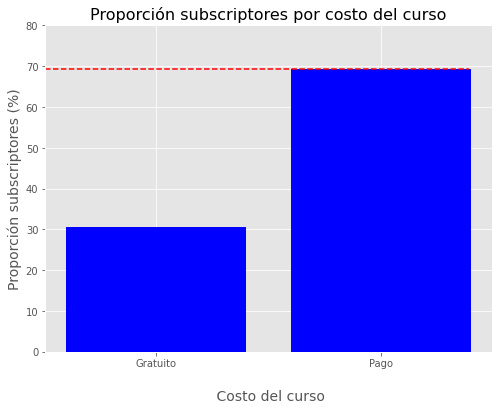

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(["Gratuito", "Pago"], [30.61, 69.38], color = "blue")

plt.ylim((0, 80))
plt.axhline(69.38, color = "red", linestyle = "--", xmax = 0.95)

plt.xlabel("\n Costo del curso", fontsize = 14)
plt.ylabel("Proporción subscriptores (%)", fontsize = 14)
plt.title("Proporción subscriptores por costo del curso", fontsize = 16)

plt.show()

#### b. Graficamos la proporción subscriptores por nivel

In [ ]:
subscrip_nivel = (df.groupby("nivel")["subscriptores"].count() / len(df)) * 100
subscrip_nivel = subscrip_nivel.sort_values().round(2)
subscrip_nivel

nivel
Expert Level           1.59
Intermediate Level    11.24
Beginner Level        34.79
All Levels            52.38
Name: subscriptores, dtype: float64

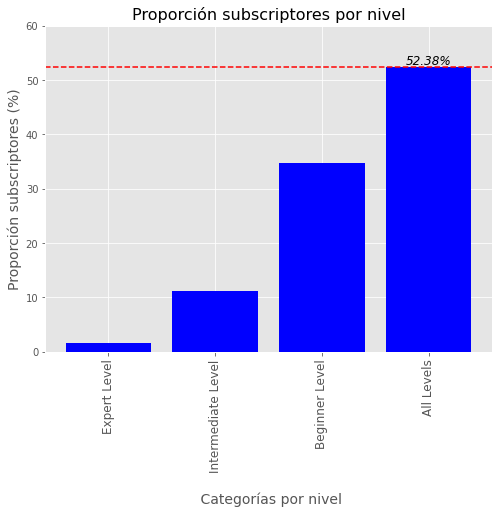

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(subscrip_nivel.index, subscrip_nivel, color = "blue")

plt.ylim((0, 60))
plt.axhline(52.38, color = "red", linestyle = "--")
style = dict(size =12, color = 'black', fontstyle = "oblique")
ax.text('All Levels', 52.38, "52.38%", ha = "center", va = "bottom", **style)

plt.xlabel("\n Categorías por nivel", fontsize = 14)
plt.ylabel("Proporción subscriptores (%)", fontsize = 14)
plt.xticks(fontsize = 12, rotation=90)
plt.title("Proporción subscriptores por nivel", fontsize = 16)

plt.show()

Vemos que 'All Levels' y 'Beginners' cerca del 90% de los subscriptores 

Creamos un df donde `costo == 0` y lo agrupamos en base al `nivel` con la columna `subscriptores`

In [ ]:
subscrip_nivel_0 = df.loc[df["costo"] == 0, ["nivel", "subscriptores"]]
subscrip_nivel_0 = (subscrip_nivel_0.groupby("nivel")["subscriptores"].count() / len(subscrip_nivel_0)) *100
subscrip_nivel_0 = subscrip_nivel_0.sort_values().round(2)
subscrip_nivel_0

nivel
Expert Level           0.00
Intermediate Level     9.39
All Levels            39.48
Beginner Level        51.13
Name: subscriptores, dtype: float64

Repetimos el proceso pero con `costo == 200` (que es el valor máximo de un curso de Udemy)

In [ ]:
subscrip_nivel_200 = df.loc[df["costo"] == 200, ["nivel", "subscriptores"]]
subscrip_nivel_200 = (subscrip_nivel_200.groupby("nivel")["subscriptores"].count() / len(subscrip_nivel_200)) *100
subscrip_nivel_200 = subscrip_nivel_200.sort_values().round(2)
subscrip_nivel_200

nivel
Expert Level           3.39
Intermediate Level     7.12
Beginner Level        27.12
All Levels            62.37
Name: subscriptores, dtype: float64

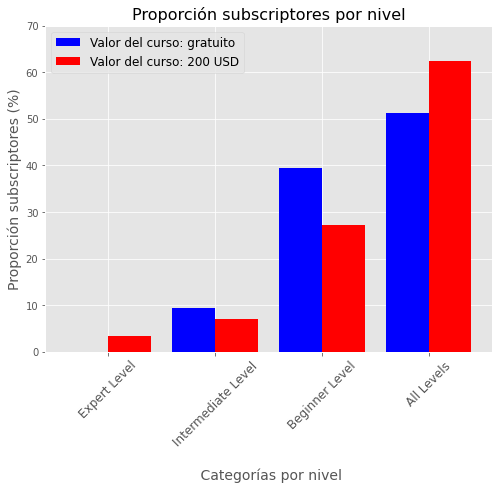

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

labels = ["Expert Level", "Intermediate Level", "Beginner Level", "All Levels"]

x = np.arange(len(labels)) 
width = 0.4

ax.bar(x - width/2, subscrip_nivel_0, color = "blue", width = 0.4, label = "Valor del curso: gratuito")
ax.bar(x + width/2, subscrip_nivel_200, color = "red", width = 0.4, label = "Valor del curso: 200 USD")

plt.xticks(fontsize = 12, rotation = 45)
plt.ylim((0, 70))
plt.xticks(x, labels)

plt.xlabel("\n Categorías por nivel", fontsize = 14)
plt.ylabel("Proporción subscriptores (%)", fontsize = 14)
plt.title("Proporción subscriptores por nivel", fontsize = 16)
plt.legend(fontsize = 12)

plt.show()

#### b. Buscamos la relación entre el precio y el número de subscriptores de los cursos

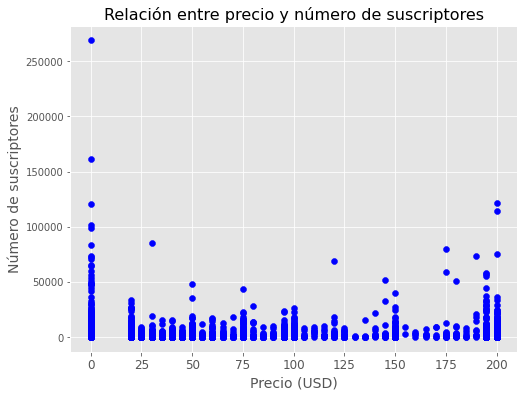

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter("costo", "subscriptores", data = df, color = "blue")

plt.xlabel("Precio (USD)", fontsize = 14)
plt.ylabel("Número de suscriptores", fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Relación entre precio y número de suscriptores", fontsize = 16)

plt.show()

En principio no se observa una relación entre el precio y el número de subscriptores.

Observamos cuál es el curso que tiene más de 200 mil subscriptores y que es gratuito

In [ ]:
mask = df["subscriptores"] > 200000
df[mask].loc[2827][["titulo", "costo", "categoria", "nivel", "subscriptores", "duracion"]]

titulo           Learn HTML5 Programming From Scratch
costo                                             0.0
categoria                             Web Development
nivel                                      All Levels
subscriptores                                268923.0
duracion                                         10.5
Name: 2827, dtype: object

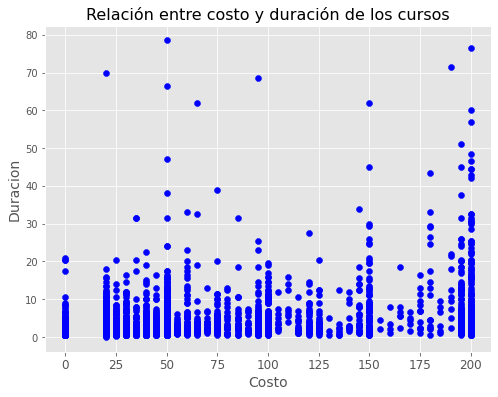

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter("costo", "duracion", data = df, color = "blue")

plt.xlabel("Costo", fontsize = 14)
plt.ylabel("Duracion", fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Relación entre costo y duración de los cursos", fontsize = 16)

plt.show()

#### d. Analizamos el costo de los cursos según el nivel del curso a través de un boxplot

In [ ]:
all_levels = df.loc[df["nivel"] == "All Levels", "costo"]
beginner_levels = df.loc[df["nivel"] == "Beginner Level", "costo"]
intermediate_levels = df.loc[df["nivel"] == "Intermediate Level", "costo"]
expert_levels = df.loc[df["nivel"] == "Expert Level", "costo"]

In [ ]:
df_plot_levels = [all_levels,beginner_levels,intermediate_levels,expert_levels]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


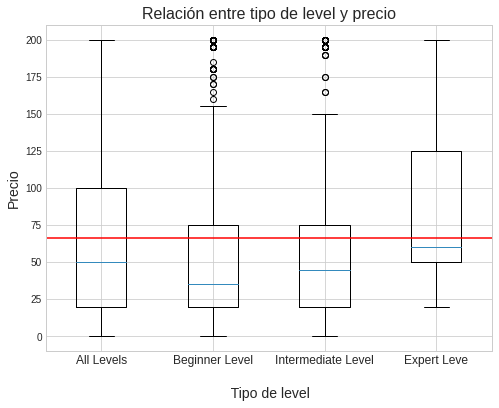

In [ ]:
# https://stackoverflow.com/questions/37191983/python-side-by-side-box-plots-on-same-figure

plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (8, 6))

level_labels = ["All Levels", "Beginner Level", "Intermediate Level", "Expert Leve"]
ax.boxplot(df_plot_levels, labels = level_labels)

plt.xlabel("\n Tipo de level", fontsize = 14)
plt.ylabel("Precio", fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Relación entre tipo de level y precio", fontsize = 16)
plt.axhline(df["costo"].mean(), color="red") 

plt.show()

Vemos que no habiendo una distibución normal en las cuatro variables la media del costo se encuantra alejada de las medianas de los distintos grupos pero que las mismas se encuentran en niveles que rondan por encima del 25 y por debajo de los 75 u$d. No revidenciandose en principio una diferencia significativa.

#### e. Realizamos algunos gráficos teniendo en cuenta la variable tiempo

In [ ]:
duracion_nivel = df.pivot_table(values = "duracion", index = "year", columns = "nivel")
duracion_nivel = duracion_nivel.fillna(0)
duracion_nivel

nivel,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,10.200000,0.000000,0.000000,0.000000
2012,6.616162,5.888889,0.000000,2.500000
2013,6.272112,3.756393,2.111111,4.416667
2014,5.111772,3.374242,1.625000,4.124011
2015,4.796418,2.506878,2.401111,2.974145
2016,4.885591,3.356790,3.318182,3.976042
2017,4.109801,3.007053,3.710526,3.790293


- Evaluamos la evolución del costo de los cursos, según el nivel del mismo, a lo largo del tiempo

In [ ]:
precio_nivel = df.pivot_table(values = "costo", index = "year", columns = "nivel")
precio_nivel = precio_nivel.fillna(0)
precio_nivel

nivel,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,62.000000,0.000000,0.000000,0.000000
2012,34.242424,67.777778,0.000000,31.666667
2013,53.316832,55.410959,64.444444,43.055556
2014,57.565056,33.668831,41.250000,47.033898
2015,75.303293,52.304217,86.000000,64.102564
2016,76.927419,59.938272,98.636364,66.218750
2017,86.644518,65.119454,113.947368,67.417582


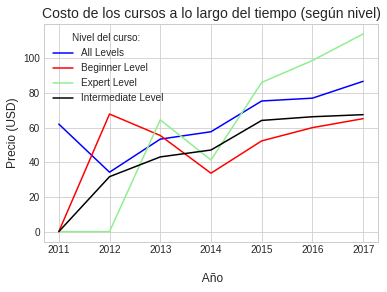

In [ ]:
plt.style.use("seaborn-whitegrid")

precio_nivel.plot(color = ["blue", "red", "lightgreen", "black"])

plt.xlabel("\n Año", fontsize = 12)
plt.ylabel("Precio (USD)", fontsize = 12)
plt.xticks(fontsize = 10)
plt.title("Costo de los cursos a lo largo del tiempo (según nivel)", fontsize = 14)
plt.legend(title = "Nivel del curso: ")

plt.show()

Vemos que Udemy ha ido aumentado la oferta de cursos principalmente para 'All Levels' y 'Expert' 

- Evaluamos  la evolución del costo de los cursos, según el tema del mismo, a lo largo del tiempo

In [ ]:
precio_tema = df.pivot_table(values = "costo", index = "year", columns = "categoria")
precio_tema = precio_tema.fillna(0)

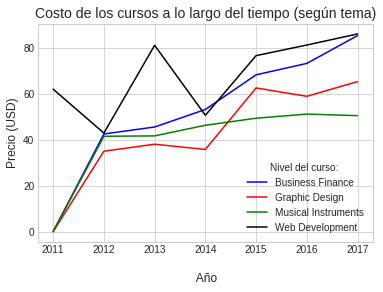

In [ ]:
plt.style.use("seaborn-whitegrid")

precio_tema.plot(color = ["blue", "red", "green", "black"])

plt.xlabel("\n Año", fontsize = 12)
plt.ylabel("Precio (USD)", fontsize = 12)
plt.xticks(fontsize = 10)
plt.title("Costo de los cursos a lo largo del tiempo (según tema)", fontsize = 14)
plt.legend(title = "Nivel del curso: ")

plt.show()

Vemos que el costo de los precios de los cursos en u$d desde el 2011 al 2017 se han incrementadopara la mayoria de las categorias salvo para 'Musical Instruments' que se mantiene con cierta estabiolidad desde el 2012.

- Veamos la evolución de la duración de los cursos, según el nivel del mismo, a lo largo del tiempo

In [ ]:
duracion_nivel = df.pivot_table(values = "duracion", index = "year", columns = "nivel")
duracion_nivel = duracion_nivel.fillna(0)
duracion_nivel

nivel,All Levels,Beginner Level,Expert Level,Intermediate Level
year,,,,
2011,10.200000,0.000000,0.000000,0.000000
2012,6.616162,5.888889,0.000000,2.500000
2013,6.272112,3.756393,2.111111,4.416667
2014,5.111772,3.374242,1.625000,4.124011
2015,4.796418,2.506878,2.401111,2.974145
2016,4.885591,3.356790,3.318182,3.976042
2017,4.109801,3.007053,3.710526,3.790293


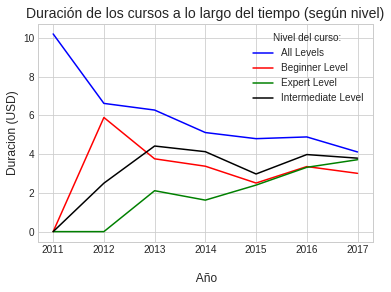

In [ ]:
plt.style.use("seaborn-whitegrid")

duracion_nivel.plot(color = ["blue", "red", "green", "black"])

plt.xlabel("\n Año", fontsize = 12)
plt.ylabel("Duracion (USD)", fontsize = 12)
plt.xticks(fontsize = 10)
plt.title("Duración de los cursos a lo largo del tiempo (según nivel)", fontsize = 14)
plt.legend(title = "Nivel del curso: ")

plt.show()

Habria una estabilización en la duración de los cursos entre 2 a 6 hs según el nivel del curso

- Veamos el número de subscriptores a lo largo de los años, según el tema

In [ ]:
subscriptores_tiempo = df.pivot_table(values = "subscriptores", index = "year", columns = "categoria")
subscriptores_tiempo = subscriptores_tiempo.fillna(0)

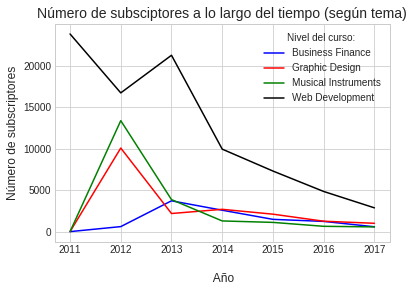

In [ ]:
plt.style.use("seaborn-whitegrid")

subscriptores_tiempo.plot(color = ["blue", "red", "green", "black"])

plt.xlabel("\n Año", fontsize = 12)
plt.ylabel("Número de subscriptores", fontsize = 12)
plt.xticks(fontsize = 10)
plt.title("Número de subsciptores a lo largo del tiempo (según tema)", fontsize = 14)
plt.legend(title = "Nivel del curso: ")

plt.show()

Vemos una caida general en los subscriptores luego de un pico 2013 para 'Web Development'

- Cursos por año y Categoria

<Figure size 720x720 with 0 Axes>

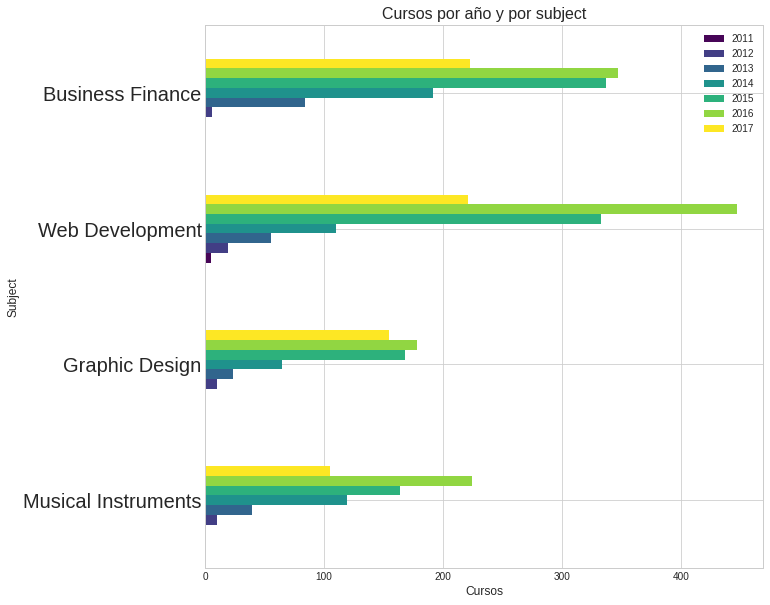

In [ ]:
df2.columns = ['total']
df3 = df2.reset_index()
df3 = df3.pivot(index='categoria', columns='year', values='total')
df3.columns = ['2011','2012','2013','2014','2015','2016','2017']
df3 = df3.reset_index()
df3['2011'] = df3['2011'].fillna(0)
df3['2012'] = df3['2012'].fillna(0)
df3['2013'] = df3['2013'].fillna(0)
df3['2014'] = df3['2014'].fillna(0)
df3['2015'] = df3['2015'].fillna(0)
df3['2016'] = df3['2016'].fillna(0)
df3['2017'] = df3['2017'].fillna(0)
df3 = df3.sort_values(by = ['2017'])
df3 = df3.tail(5)

fig = plt.figure(figsize=(10,10))
ax = df3.plot.barh(x='categoria',figsize=(10,10),  color=["#470557","#423E85","#31658D" ,"#1F928C","#2DB17C","#91D642","#FDE724"])
plt.title("Cursos por año y por subject", size=16)
plt.margins(y=0)
plt.xlabel("Cursos", size =12)
plt.ylabel("Subject", size =12)
plt.yticks(size =20)

plt.show()

Los cursos más ofrecidos por UDEMY a los largo de los últimos siete años se concebtran en 'Buisness Finance' y 'Web Development'

In [ ]:
cursos_tiempo = df.pivot_table(values = "id_curso", index = "year", columns = "categoria", aggfunc = 'count')
cursos_tiempo = cursos_tiempo.fillna(0)
cursos_tiempo.style.highlight_max(color = 'blue', axis = 0)

categoria,Business Finance,Graphic Design,Musical Instruments,Web Development
year,,,,
2011,0,0,0,5
2012,6,10,10,19
2013,84,23,39,55
2014,192,65,119,110
2015,337,168,164,333
2016,347,178,224,447
2017,223,155,105,221


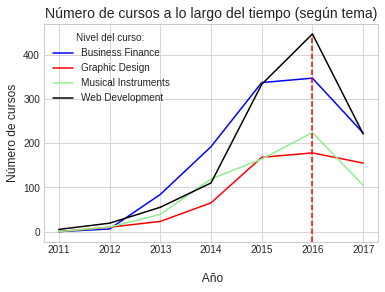

In [ ]:
plt.style.use("seaborn-whitegrid")

cursos_tiempo.plot(color = ["blue", "red", "lightgreen", "black"])

plt.axvline(2016, color="red", linestyle = "--", ymax = 0.95) 
plt.xlabel("\n Año", fontsize = 12)
plt.ylabel("Número de cursos", fontsize = 12)
plt.xticks(fontsize = 10)
plt.title("Número de cursos a lo largo del tiempo (según tema)", fontsize = 14)
plt.legend(title = "Nivel del curso: ")

plt.show()